Problem 8: Interface Fluctuations

Steps are below:
1. initial a starting surface
2. Monte carlo agrithm to change the height
3. calculate the energy difference and check if accept new surface
4. calculate the acceptance rate and confirm the increment height $\delta h$
5. calculate the interface width


parameters:
1. system size N*N

2. $\beta$*surface tension $\beta*\sigma$

If we consider the presence of the gravitational field ,we have another parameter: 

3. $\rho g$

We will fix the increment height $\delta h$ =1 in the question (d)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


def initial_surface(N):
    return np.zeros((N,N))

def energy_diff(i,j,deltah,h_):
    N = len(h_)
    return -(2*deltah*(h_[(i+1)%N,j]+h_[(i-1)%N,j]+h_[i,(j-1)%N]+h_[i,(j+1)%N]-4*h_[i,j])-4*deltah**2)

def monte_carlo(h_,betasigma,deltah):
    success = 1
    N=len(h_)
    i = np.random.randint(N)
    j = np.random.randint(N)
    random_deltah = np.random.uniform(-deltah,deltah)
    beta_deltaE=betasigma*energy_diff(i,j,random_deltah,h_)

    alpha = np.random.random()
    if beta_deltaE<=0:
        h_[i,j]+=random_deltah
    elif alpha<=np.exp(-beta_deltaE):
        h_[i,j]+=random_deltah
    else:
        success = 0
    return success

def sos_animation(N,betasigma,deltah):
    h_=initial_surface(N)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(0, h_.shape[1], 1)
    y = np.arange(0, h_.shape[0], 1)
    X, Y = np.meshgrid(x, y)
    
    surf = ax.plot_surface(X, Y, h_, cmap='terrain')
    def updata_surface(frame,h_,surf):
        ax.collections.clear()
        for _ in range(100):
            monte_carlo(h_,betasigma,deltah)
        surf = ax.plot_surface(X, Y, h_, cmap='terrain')
        return surf


    ani=animation.FuncAnimation(fig,updata_surface,frames=range(100),fargs=(h_,surf,),interval=100)
    ax.set_zlim(-1.5, 1.5)
    ani.save('set6.gif', writer='imagemagick', fps=300)

In [58]:
N=10
h_=initial_surface(N)
np.exp(-energy_diff(2,1,0.5,h_))

0.36787944117144233

In [59]:
N=10
betasigma,deltah=1,0.1
h_=initial_surface(N)
for i in range(10000):
    monte_carlo(h_,betasigma,deltah)
h_

array([[ 0.18005265, -0.38975286, -0.24666816,  0.01277753,  0.05839991,
         0.34161144,  0.04460411,  0.05224061, -0.01306764,  0.08414945],
       [ 0.10329402, -0.19621706, -0.31796516, -0.56993666, -0.99108587,
        -0.06826138,  0.2761455 , -0.01575234, -0.11651572,  0.27674472],
       [ 0.12270059, -0.07612731, -0.23294818, -0.58579329,  0.00890865,
        -0.06851455, -0.34131353, -0.10009517, -0.01270021,  0.3811628 ],
       [-0.05524471,  0.39927079,  0.75650262, -0.04307689, -0.38487533,
        -0.13502123, -0.20533001, -0.36128617,  0.590168  ,  0.42059997],
       [ 0.31831485, -0.31212097,  0.19772423, -0.00124702, -0.64654985,
        -0.00201723, -0.05937499, -0.18558782,  0.56692215, -0.09908433],
       [ 0.33040878, -0.01224533, -0.34188688, -0.34641074,  0.09553279,
         0.25713232, -0.09848841, -0.32219377,  0.14183467,  0.19509389],
       [-0.31446329,  0.29426933,  0.08505518, -0.02968847,  0.61261726,
        -0.36279816,  0.57656446, -0.08915884

MovieWriter imagemagick unavailable; using Pillow instead.


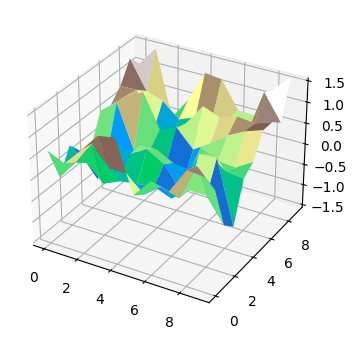

In [60]:
sos_animation(10, 1, 1)


In [61]:
#To confirm the increment height by acceptance rate. we will choose 1 as the increment height for convience
N=20
betasigma=1.0
deltah_list = np.linspace(0.5,2,100)


for deltah in deltah_list:
    h_=initial_surface(N)
    success_times=0
    for _ in range(10000):
        success_times+= monte_carlo(h_,betasigma,deltah)
    success_rate = success_times/10000
    if success_rate<=0.5:
        print("Increment height $delta h$ = ", deltah,' success_rate = ',success_rate)
        break

Increment height $delta h$ =  1.0303030303030303  success_rate =  0.4998


(a)For fixed system size N =20, calculate $w$ as a function of surface tension for $\sigma/k_BT =0.25,0.5,1.0,2.0,5.0,10.0$. Plot $w$ as a function of  $\sigma/k_BT$ and extract the functional dependence.

$$<h^2> = \frac{k_B T}{2\pi \sigma} ln(\frac{L}{a})$$

Text(0, 0.5, 'interface width $w^2$')

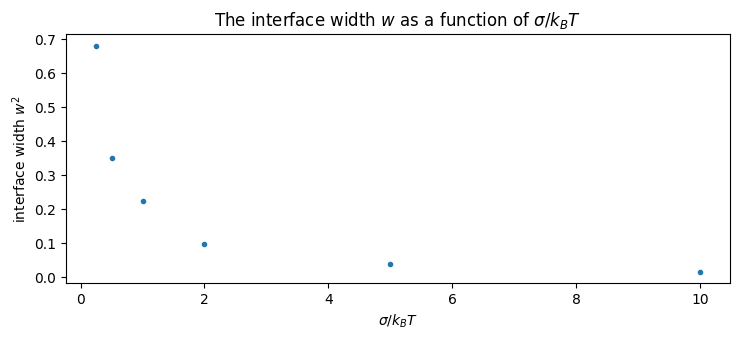

In [62]:
betasigma_list=[0.25,0.5,1.0,2.0,5.0,10.0]
N=20
time = 100
deltah = 1
MCS = int(N**2/2)
w_list = []
for betasigma in betasigma_list:
    h_=initial_surface(N)
    w=0
    for step in range(MCS*time):
        monte_carlo(h_,betasigma,deltah)
        if step>=5*MCS:
            w+=np.var(h_)
    w_list.append(w/(MCS*(time-5)))
plt.plot(betasigma_list,w_list,'.')
plt.title('The interface width $w$ as a function of $\sigma/k_BT$')
plt.xlabel(r'$\sigma/k_BT$')
plt.ylabel(r'interface width $w^2$')

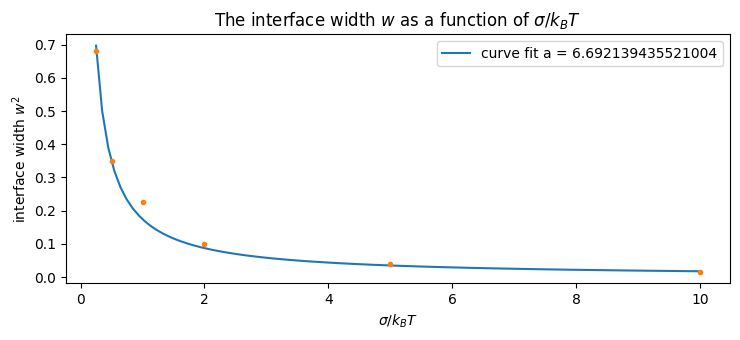

In [63]:
# fitting function and analytical function
def ana_func(x,a):
    L=20
    return np.log(L/a)/(2*np.pi)/x
x = np.linspace(0.25,10,100)
popt,pcov = curve_fit(ana_func,betasigma_list,w_list)
y_fit = ana_func(x,popt)
plt.plot(x,y_fit,label='curve fit a = '+str(popt[0]))
plt.plot(betasigma_list,w_list,'.')
plt.title('The interface width $w$ as a function of $\sigma/k_BT$')
plt.xlabel(r'$\sigma/k_BT$')
plt.ylabel(r'interface width $w^2$')
plt.legend()

(b) For fixed tension $\sigma/k_BT=1.0$, determine the dependence of $w$ on the system size N =5,10,20,40,80. Show that the numerical results are consistent with a logarithmic dependence on system size.

Text(0, 0.5, 'interface width $w^2$')

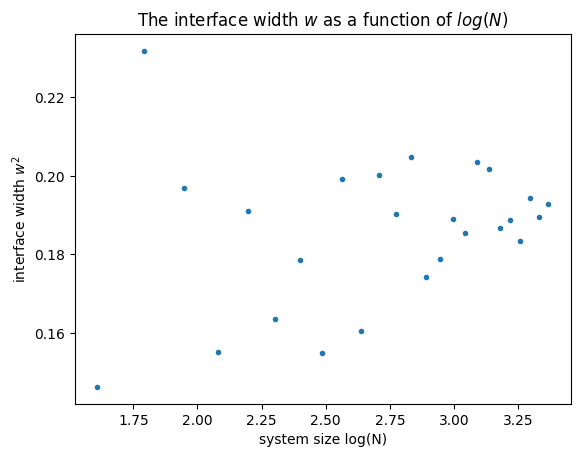

In [10]:
betasigma=1.0
N_list = range(5,30)
time = 50
deltah = 1
w_list = []

for N in N_list:
    MCS = int(N**2/2)
    h_=initial_surface(N)
    w=0
    for step in range(MCS*time):
        monte_carlo(h_,betasigma,deltah)
        if step>=10*MCS:
            w+=np.var(h_)
    w_list.append(w/(MCS*(time-10)))
plt.plot(np.log(N_list),w_list,'.')
plt.title('The interface width $w$ as a function of $log(N)$')
plt.xlabel(r'system size log(N)')
plt.ylabel(r'interface width $w^2$')

C:\Users\Xiongxiao Wang\AppData\Local\Temp\ipykernel_20832\2905341482.py:3: RuntimeWarning: invalid value encountered in log
  return 1/(2*np.pi)**2*(np.log(1/a)+x)


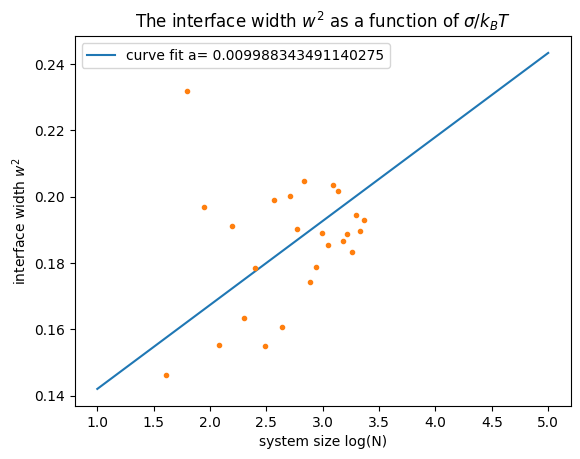

In [11]:
#fitting function w**2 = kbT/(2pi*sigma) log (L/a), here sigma/kbT = 1
def ana_func_2(x,a):
    return 1/(2*np.pi)**2*(np.log(1/a)+x)
x = np.linspace(1,5,100)
popt,_ = curve_fit(ana_func_2,np.log(N_list),w_list)
y_fit = ana_func_2(x,*popt)
plt.plot(x,y_fit,label='curve fit a= '+str(popt[0]))
plt.plot(np.log(N_list),w_list,'.')
plt.title('The interface width $w^2$ as a function of $\sigma/k_BT$')
plt.xlabel(r'system size log(N)')
plt.ylabel(r'interface width $w^2$')
plt.legend()

(c) For an interface close to a wall, which is pushed "gently" to the wall by a gravational field, is described by the additional potential
$$H_g = -\sum_i \rho g h_i$$
for $h_i>0$, and $H_g \rightarrow \infty$, for $h_i<0$, where $\rho$ is a mass density and g the gravitational force constant. Calculatethe average wall separation $\overline h$ as a function of $\rho g$ for small surface tensions $\sigma$. On the basis of the simulation results, can you guess the functional dependence of $\overline h$ on $\rho g$?

In [70]:
def initial_surface(N):
    return np.zeros((N,N))

def energy_diff(i,j,deltah,h_,rhog):
    N = len(h_)
    deltaH = -(2*deltah*(h_[(i+1)%N,j]+h_[(i-1)%N,j]+h_[i,(j-1)%N]+h_[i,(j+1)%N]-4*h_[i,j])-4*deltah**2)
    deltaHg = -rhog*deltah
    return deltaH+deltaHg

def monte_carlo(h_,betasigma,deltah,rhog):
    success = 1
    N=len(h_)
    i = np.random.randint(N)
    j = np.random.randint(N)
    random_deltah = np.random.uniform(-deltah,deltah)
    alpha = np.random.random()
    if random_deltah+h_[i,j]>0:
        return 0
    beta_deltaE=betasigma*energy_diff(i,j,random_deltah,h_,rhog)
    if beta_deltaE<=0:
        h_[i,j]+=random_deltah
    elif alpha<=np.exp(-beta_deltaE):
        h_[i,j]+=random_deltah
    else:
        success = 0
    return success

def sos_animation(N,betasigma,deltah,rhog):
    h_=initial_surface(N)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(0, h_.shape[1], 1)
    y = np.arange(0, h_.shape[0], 1)
    X, Y = np.meshgrid(x, y)
    
    surf = ax.plot_surface(X, Y, h_, cmap='terrain')
    def updata_surface(frame,h_,surf):
        ax.collections.clear()
        for _ in range(100):
            monte_carlo(h_,betasigma,deltah,rhog)
        surf = ax.plot_surface(X, Y, h_, cmap='terrain')
        return surf


    ani=animation.FuncAnimation(fig,updata_surface,frames=range(100),fargs=(h_,surf,),interval=100)
    ax.set_zlim(-1.5,0)
    ani.save('set6_c.gif', writer='imagemagick', fps=300)

In [67]:
N=10
h_=initial_surface(N)
np.exp(-energy_diff(2,1,-6,h_,1))

7.175095973164411e-66

MovieWriter imagemagick unavailable; using Pillow instead.


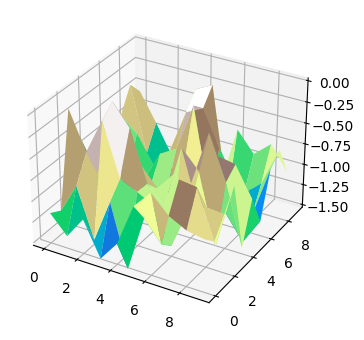

In [68]:
sos_animation(10,1,1,0.02)

Text(0, 0.5, 'Average height $\\overline{h}$')

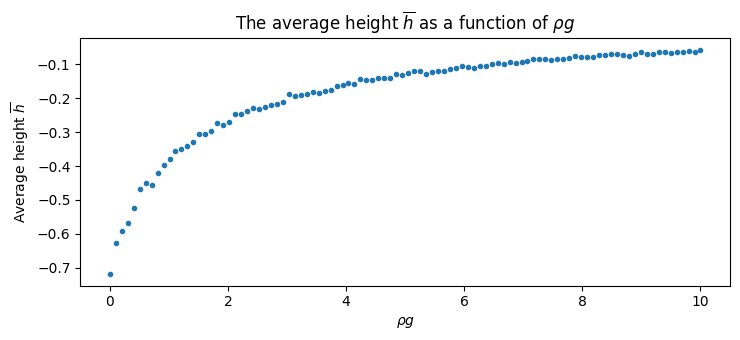

In [74]:
rhog_list = np.linspace(0,10,100)
betasigma=1.0
N=20
time = 100
deltah = 1
MCS = int(N**2/2)
h_list = []
for rhog in rhog_list:
    h_=initial_surface(N)
    h=0
    for step in range(MCS*time):
        monte_carlo(h_,betasigma,deltah,rhog)
        if step>=5*MCS:
            h+=np.mean(h_)
    h_list.append(h/(MCS*(time-5)))
plt.plot(rhog_list,h_list,'.')
plt.title(r"The average height $\overline{h}$ as a function of $\rho g$")
plt.xlabel(r'$\rho g$')
plt.ylabel(r"Average height $\overline{h}$")


Text(0, 0.5, 'Average height $\\overline{h}$')

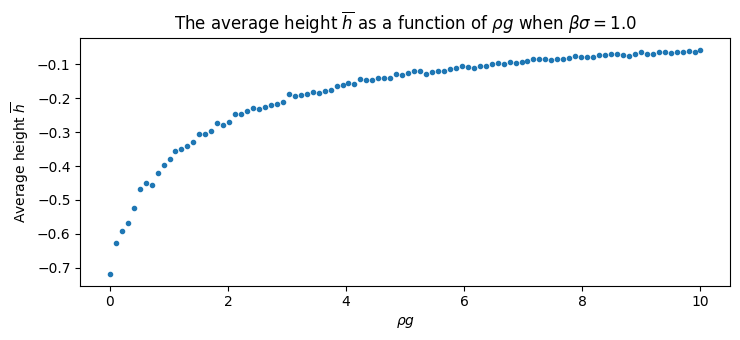

In [75]:
plt.plot(rhog_list,h_list,'.')
plt.title(r"The average height $\overline{h}$ as a function of $\rho g$ when $\beta \sigma = 1.0$")
plt.xlabel(r'$\rho g$')
plt.ylabel(r"Average height $\overline{h}$")

(d) A variant of the SOS model for interfaces between crystalline solids and liquids uses integer height variables $h_i in {...,-2,-1,0,+1,+2,...}$. Use the increments $\pm 1$ for the updates of the height variables. Calculate again $w$ as a function of $\sigma/k_BT$ for N =40. How do the results differ from the case of continuous height variables?

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


def initial_surface(N):
    return np.zeros((N,N))

def energy_diff(i,j,deltah,h_):
    N = len(h_)
    return -(2*deltah*(h_[(i+1)%N,j]+h_[(i-1)%N,j]+h_[i,(j-1)%N]+h_[i,(j+1)%N]-4*h_[i,j])-4*deltah**2)

def monte_carlo(h_,betasigma,deltah):
    success = 1
    N=len(h_)
    i = np.random.randint(N)
    j = np.random.randint(N)
    random_deltah = np.random.choice([-deltah,deltah])
    beta_deltaE=betasigma*energy_diff(i,j,random_deltah,h_)

    alpha = np.random.random()
    if beta_deltaE<=0:
        h_[i,j]+=random_deltah
    elif alpha<=np.exp(-beta_deltaE):
        h_[i,j]+=random_deltah
    else:
        success = 0
    return success

def sos_animation(N,betasigma,deltah):
    h_=initial_surface(N)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(0, h_.shape[1], 1)
    y = np.arange(0, h_.shape[0], 1)
    X, Y = np.meshgrid(x, y)
    
    surf = ax.plot_surface(X, Y, h_, cmap='terrain')
    def updata_surface(frame,h_,surf):
        ax.collections.clear()
        for _ in range(100):
            monte_carlo(h_,betasigma,deltah)
        surf = ax.plot_surface(X, Y, h_, cmap='terrain')
        return surf


    ani=animation.FuncAnimation(fig,updata_surface,frames=range(100),fargs=(h_,surf,),interval=100)
    ax.set_zlim(-3, 3)
    ani.save('set6_d.gif', writer='imagemagick', fps=300)

MovieWriter imagemagick unavailable; using Pillow instead.


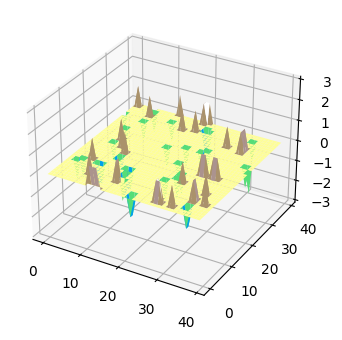

In [91]:
sos_animation(40,1.0,1)

Text(0, 0.5, 'interface width $w^2$')

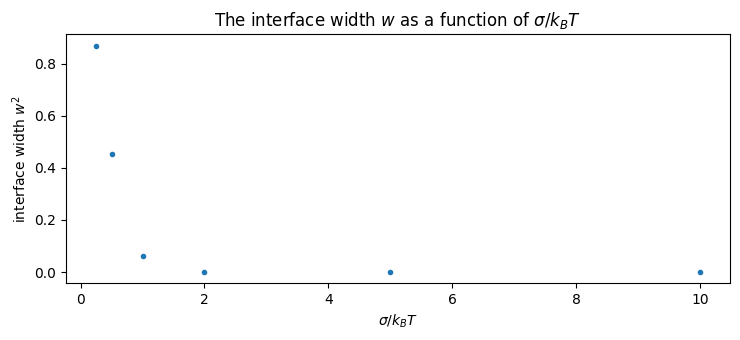

In [95]:
betasigma_list=[0.25,0.5,1.0,2.0,5.0,10.0]
N=40
time = 100
deltah = 1
MCS = int(N**2/2)
w_list = []
for betasigma in betasigma_list:
    h_=initial_surface(N)
    w=0
    for step in range(MCS*time):
        monte_carlo(h_,betasigma,deltah)
        if step>=5*MCS:
            w+=np.var(h_)
    w_list.append(w/(MCS*(time-5)))
plt.plot(betasigma_list,w_list,'.')
plt.title('The interface width $w$ as a function of $\sigma/k_BT$')
plt.xlabel(r'$\sigma/k_BT$')
plt.ylabel(r'interface width $w^2$')

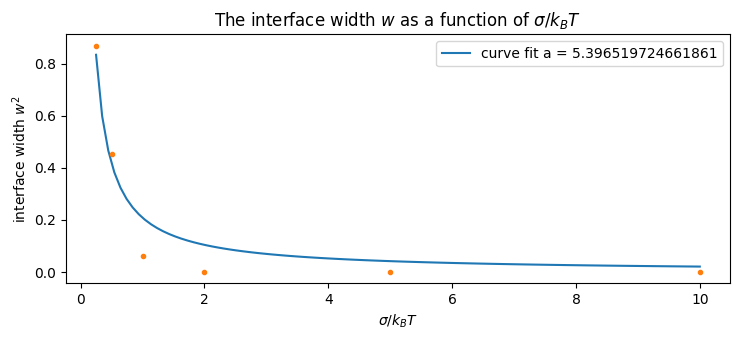

In [96]:
# fitting function and analytical function
def ana_func(x,a):
    L=20
    return np.log(L/a)/(2*np.pi)/x
x = np.linspace(0.25,10,100)
popt,pcov = curve_fit(ana_func,betasigma_list,w_list)
y_fit = ana_func(x,popt)
plt.plot(x,y_fit,label='curve fit a = '+str(popt[0]))
plt.plot(betasigma_list,w_list,'.')
plt.title('The interface width $w$ as a function of $\sigma/k_BT$')
plt.xlabel(r'$\sigma/k_BT$')
plt.ylabel(r'interface width $w^2$')
plt.legend()